# 数据探索
- 检查数据错误
- 了解数据分布特征和内在规律
# 数据预处理
- 数据清洗 Data cleaning
- 数据集成 Data integration
- 数据变换 Data transformation
- 数据规约 Data reduction

## 数据清洗
### 缺失值处理
- 删除
- 填充
缺失值填充
- 固定值
- 均值、中位数、众数
- 上下数据
- 插值函数
- 最可能的值
### 异常值处理
如何观测异常值？
- 简单统计
- 绘图
- 基于密度、最近邻和、聚类等方法
如何处理？
- 同缺失值处理
- 局部均值（分箱）
- 不处理

In [1]:
import pandas as pd

In [25]:
df_nan = pd.read_csv('AXP.csv', index_col='Date')

In [26]:
df_nan.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-25,166.139999,174.470001,159.660004,173.110001,170.730621,13320800
2022-01-26,176.949997,179.220001,173.029999,175.320007,172.910248,8257300
2022-01-27,300.699997,178.199997,170.630005,171.899994,169.537262,3649900
2022-01-28,NaN,177.210007,169.770004,177.059998,174.626328,4271500
2022-01-31,175.910004,180.130005,175.220001,179.820007,177.348404,5524300


In [4]:
df_nan.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-25,False,False,False,False,False,False
2022-01-26,False,False,False,False,False,False
2022-01-27,False,False,False,False,False,False
2022-01-28,True,False,False,False,False,False
2022-01-31,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-01-18,False,False,False,False,False,False
2023-01-19,False,False,False,False,False,False
2023-01-20,False,False,False,False,False,False


In [5]:
help(df_nan.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis: 'Axis' = 0, how: 'str' = 'any', thresh=None, subset=None, inplace: 'bool' = False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If a

In [6]:
df_nan.dropna(how='all')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-25,166.139999,174.470001,159.660004,173.110001,170.730621,13320800
2022-01-26,176.949997,179.220001,173.029999,175.320007,172.910248,8257300
2022-01-27,176.699997,178.199997,170.630005,171.899994,169.537262,3649900
2022-01-28,NaN,177.210007,169.770004,177.059998,174.626328,4271500
2022-01-31,175.910004,180.130005,175.220001,179.820007,177.348404,5524300
...,...,...,...,...,...,...
2023-01-18,154.490005,154.759995,150.320007,150.419998,150.419998,2762400
2023-01-19,146.610001,148.000000,144.199997,146.850006,146.850006,3852300
2023-01-20,147.960007,151.779999,147.720001,151.600006,151.600006,3953900


In [27]:
df_nan.fillna(df_nan.mean(), inplace=True)

In [28]:
df_nan.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-25,166.139999,174.470001,159.660004,173.110001,170.730621,13320800
2022-01-26,176.949997,179.220001,173.029999,175.320007,172.910248,8257300
2022-01-27,300.699997,178.199997,170.630005,171.899994,169.537262,3649900
2022-01-28,160.708273,177.210007,169.770004,177.059998,174.626328,4271500
2022-01-31,175.910004,180.130005,175.220001,179.820007,177.348404,5524300


In [29]:
df_nan.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,160.708273,162.407960,157.969402,160.190600,158.889134,3.429341e+06
std,18.853776,16.857738,16.555709,16.692266,16.012279,1.597481e+06
min,131.350006,137.240005,130.649994,134.910004,133.932724,6.658000e+05
25%,147.500000,149.285004,145.665001,147.020004,146.581924,2.571250e+06
50%,155.600006,157.350006,153.320007,154.919998,154.234589,3.073400e+06
75%,171.985001,174.795006,169.520004,172.004998,169.983880,3.934450e+06
max,300.699997,199.550003,197.240005,198.380005,195.653290,1.332080e+07


<AxesSubplot:>

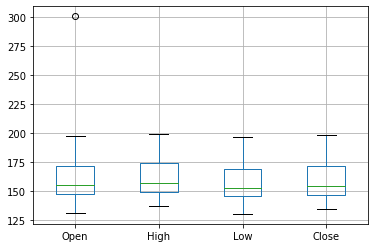

In [30]:
df_nan.iloc[:, 0:4].boxplot()

In [31]:
df_nan[abs(df_nan - df_nan.mean()) > 3 * df_nan.std()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-25,NaN,NaN,NaN,NaN,NaN,13320800.0
2022-01-26,NaN,NaN,NaN,NaN,NaN,8257300.0
2022-01-27,300.699997,NaN,NaN,NaN,NaN,NaN
2022-01-28,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-19,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-20,NaN,NaN,NaN,NaN,NaN,NaN
